<a href="https://colab.research.google.com/github/Fpinto99/Time_Series/blob/main/TS_Project2ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Carregamento do dataset**

In [ ]:
import pandas as pd

df = pd.read_csv("BTC_Price2014-2024.csv")

# Garantir que as colunas são numéricas (caso tenham vindo com vírgulas ou strings)
cols_numericas = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
for col in cols_numericas:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Converter 'Date' e definir como índice
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Remover NaN
df.dropna(inplace=True)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3412 entries, 2014-09-18 to 2024-01-21
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3412 non-null   float64
 1   High       3412 non-null   float64
 2   Low        3412 non-null   float64
 3   Close      3412 non-null   float64
 4   Adj Close  3412 non-null   float64
 5   Volume     3412 non-null   float64
 6   currency   3412 non-null   object 
dtypes: float64(6), object(1)
memory usage: 213.2+ KB
None


# **Pequeno resumo da Série em estudo**

Período:  18/09/2014 a 21/01/2024

Total de dias: 3.412

Preço de fecho (Close):

Mínimo: $178

Máximo: $67.566

Média: $14.758

Volume médio: ~16 mil milhões por dia

# **Análise Exploratória da Série Temporal**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import STL
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

sns.set(style="darkgrid")
plt.rcParams["figure.figsize"] = (14, 6)

# **Gráfico completo**

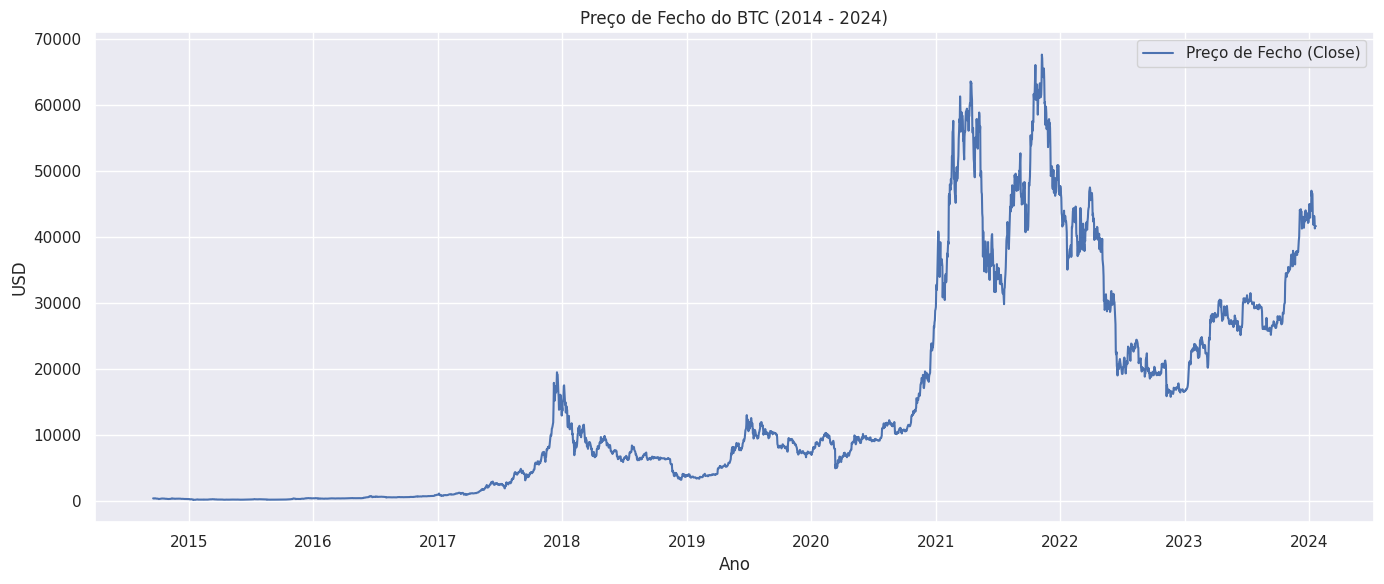

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Close'], label="Preço de Fecho (Close)")
plt.title("Preço de Fecho do BTC (2014 - 2024)")
plt.xlabel("Ano")
plt.ylabel("USD")
plt.legend()
plt.tight_layout()
plt.show()

# **Decomposição STL (últimos 5 anos)**

<ipython-input-8-4b952dbd93e3>:1: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  df_stl = df['Close'].last('5Y')
<ipython-input-8-4b952dbd93e3>:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_stl = df['Close'].last('5Y')


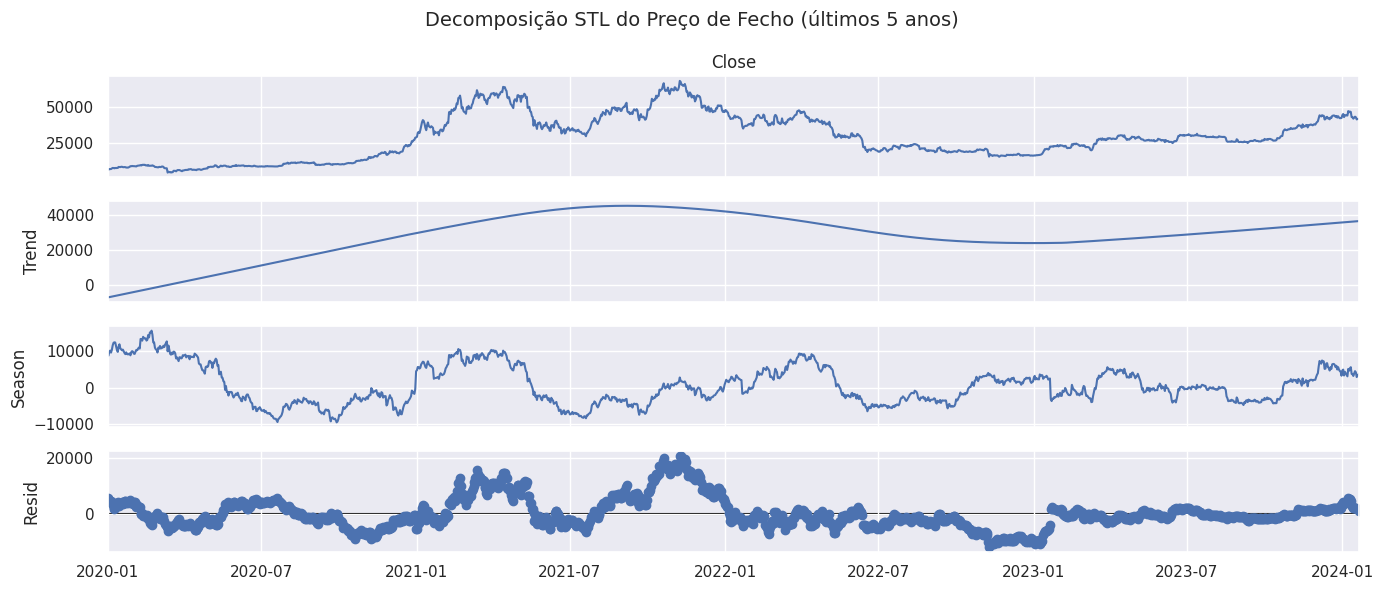

In [ ]:
df_stl = df['Close'].last('5Y')
stl = STL(df_stl, period=365)
res = stl.fit()
res.plot()
plt.suptitle("Decomposição STL do Preço de Fecho (últimos 5 anos)", fontsize=14)
plt.tight_layout()
plt.show()

# **Gráfico ACF e PACF**

<ipython-input-9-ee5cdf8ab700>:1: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  plot_acf(df['Close'].last('3Y'), lags=60)
<ipython-input-9-ee5cdf8ab700>:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  plot_acf(df['Close'].last('3Y'), lags=60)


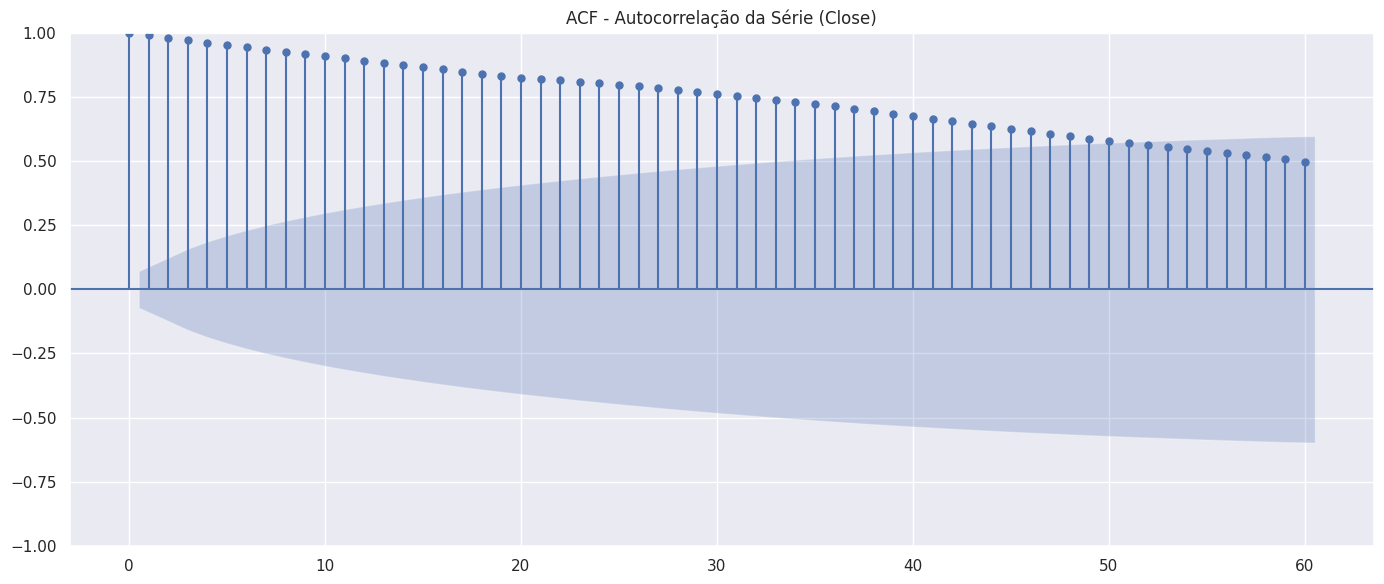

<ipython-input-9-ee5cdf8ab700>:6: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  plot_pacf(df['Close'].last('3Y'), lags=60)
<ipython-input-9-ee5cdf8ab700>:6: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  plot_pacf(df['Close'].last('3Y'), lags=60)


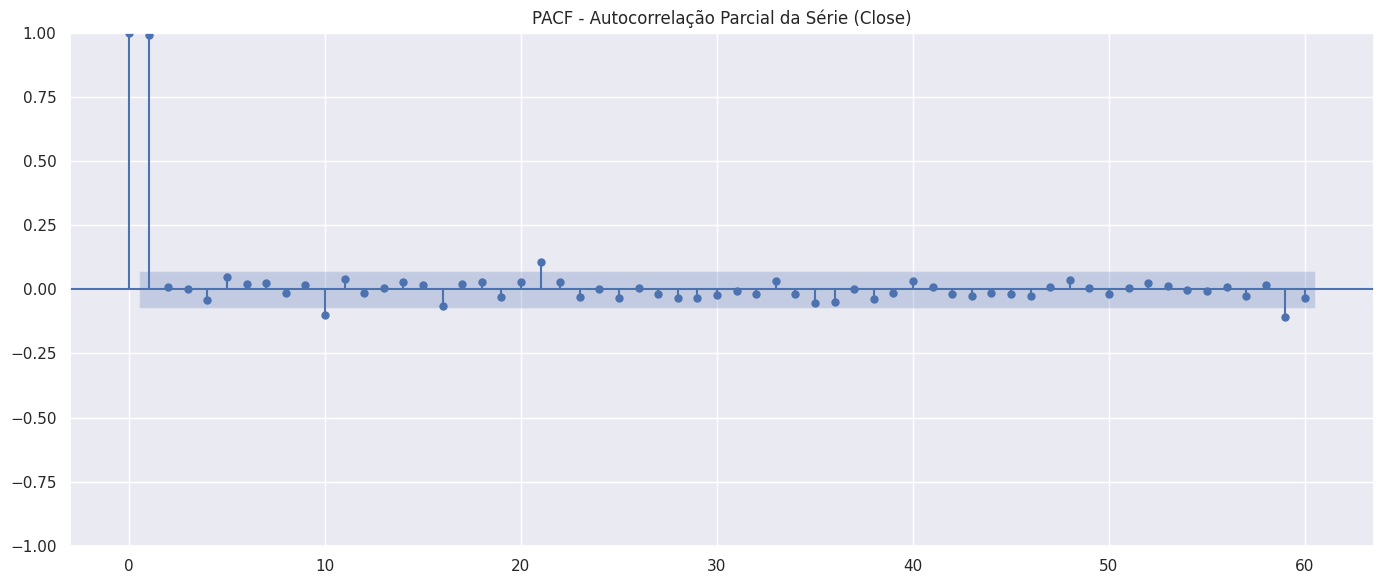

In [ ]:
plot_acf(df['Close'].last('3Y'), lags=60)
plt.title("ACF - Autocorrelação da Série (Close)")
plt.tight_layout()
plt.show()

plot_pacf(df['Close'].last('3Y'), lags=60)
plt.title("PACF - Autocorrelação Parcial da Série (Close)")
plt.tight_layout()
plt.show()

# **Previsão da label (Closed)**

Separação dos dados (treino e teste)

In [ ]:
train = df[:'2023-11-30']
test = df['2023-12-01':]

# **Aplicação de Modelos Clássicos**

Holt Winters

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Holt-Winters
MAE:  3173.06
RMSE: 4185.31


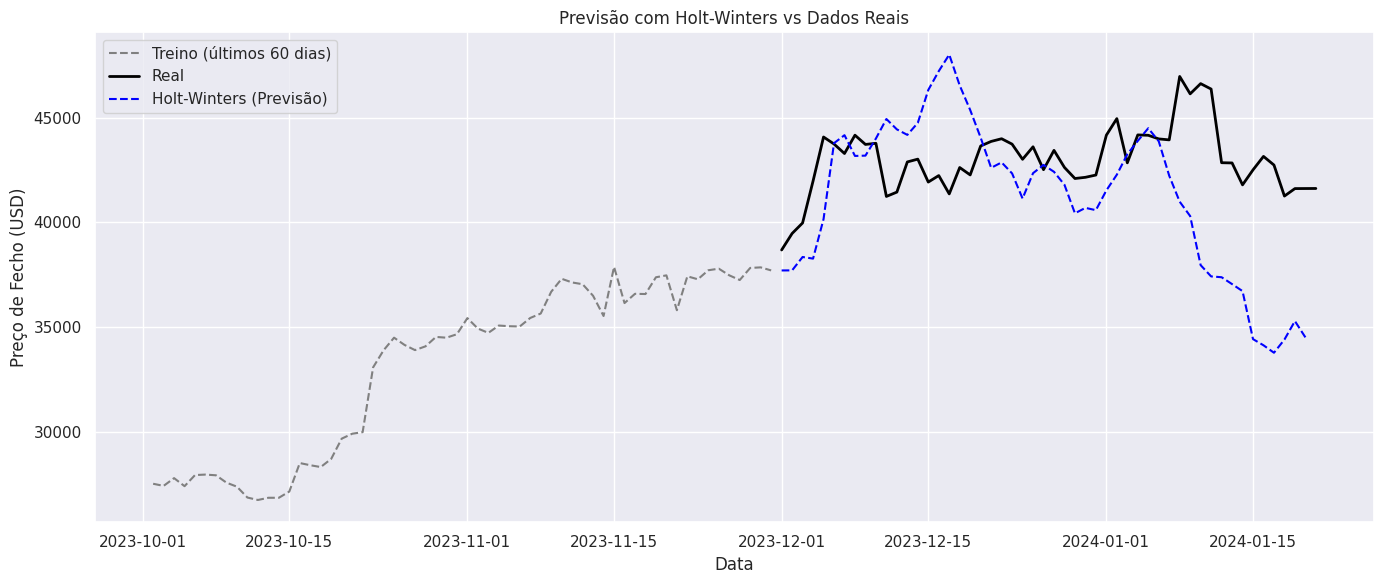

Métricas - Holt-Winters


,Modelo,MAE,RMSE
0,Holt-Winters,3173.059292,4185.309343



 Previsões - Holt-Winters


,Data,Real,Holt-Winters
0,2023-12-01,38688.750000,37711.687405
1,2023-12-02,39476.332031,37715.106774
2,2023-12-03,39978.390625,38353.144566
3,2023-12-04,41980.097656,38276.219778
4,2023-12-05,44080.648438,40159.798175
5,2023-12-06,43746.445313,43785.667513
6,2023-12-07,43292.664063,44167.257923
7,2023-12-08,44166.601563,43176.561754
8,2023-12-09,43725.984375,43191.698883
9,2023-12-10,43779.699219,44008.001776


In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# 1. Separar treino e teste
train = df[:'2023-11-30']
test = df['2023-12-01':]

# 2. Treinar modelo Holt-Winters
model_hw = ExponentialSmoothing(
    train['Close'],
    trend='mul',
    seasonal='mul',
    seasonal_periods=365
)
model_hw_fit = model_hw.fit()

# 3. Prever
forecast_hw = model_hw_fit.forecast(len(test))

# 4. Avaliar
mae_hw = mean_absolute_error(test['Close'], forecast_hw)
rmse_hw = mean_squared_error(test['Close'], forecast_hw) ** 0.5

# 5. Mostrar resultados
print("Holt-Winters")
print(f"MAE:  {mae_hw:.2f}")
print(f"RMSE: {rmse_hw:.2f}")

# 6. Guardar previsões para usar mais tarde
holt_winters_pred = forecast_hw.copy()

tabela_previsoes_hw = pd.DataFrame({
    "Data": test.index,
    "Real": test['Close'].values,
    "Holt-Winters": forecast_hw.values
})


tabela_metricas_hw = pd.DataFrame({
    "Modelo": ["Holt-Winters"],
    "MAE": [mae_hw],
    "RMSE": [rmse_hw]
})

plt.figure(figsize=(14, 6))
plt.plot(train.index[-60:], train['Close'][-60:], label="Treino (últimos 60 dias)", color="gray", linestyle='--')
plt.plot(test.index, test['Close'], label="Real", color="black", linewidth=2)
plt.plot(forecast_hw.index, forecast_hw, label="Holt-Winters (Previsão)", linestyle='--', color='blue')

plt.title("Previsão com Holt-Winters vs Dados Reais")
plt.xlabel("Data")
plt.ylabel("Preço de Fecho (USD)")
plt.legend()
plt.tight_layout()
plt.show()

print("Métricas - Holt-Winters")
display(tabela_metricas_hw)

print("\n Previsões - Holt-Winters")
display(tabela_previsoes_hw.head(10))

# **ARIMA**

In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 32.2 MB/s eta 0:00:00


In [ ]:
!pip install numpy==1.23.5

  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pmdarima 2.0.4 requires statsmodels>=0.13.2, which is not installed.
plotnine 0.14.5 requires statsmodels>=0.14.0, which is not installed.
tsfresh 0.21.0 requires statsmodels>=0.13, which is not installed.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
xarray 2025.3.

In [ ]:
p_values = range(0, 4)
d_values = [1]  # geralmente 1 basta, pois já fizeste a diferenciação
q_values = range(0, 4)

# Guarda os resultados aqui
resultados = []

# Loop pelas combinações
for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                model = ARIMA(train['Close'], order=(p, d, q))
                model_fit = model.fit()
                pred = model_fit.forecast(steps=len(test))
                mae = mean_absolute_error(test['Close'], pred)
                rmse = mean_squared_error(test['Close'], pred) ** 0.5
                resultados.append({
                    "p": p, "d": d, "q": q,
                    "MAE": mae,
                    "RMSE": rmse
                })
                print(f"ARIMA({p},{d},{q}) → MAE: {mae:.2f} | RMSE: {rmse:.2f}")
            except:
                print(f"ARIMA({p},{d},{q}) falhou.")
                continue

# Converter resultados para DataFrame
df_resultados_arima = pd.DataFrame(resultados)

# Ordenar pelo RMSE (ou MAE)
df_resultados_arima = df_resultados_arima.sort_values(by="RMSE", ascending=True).reset_index(drop=True)

# Mostrar top 5 modelos
print("\n Top 5 combinações:")
display(df_resultados_arima.head(5))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

ARIMA(0,1,0) → MAE: 5301.26 | RMSE: 5537.12
ARIMA(0,1,1) → MAE: 5297.48 | RMSE: 5533.50


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0,1,2) → MAE: 5298.29 | RMSE: 5534.30


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0,1,3) → MAE: 5287.90 | RMSE: 5524.42
ARIMA(1,1,0) → MAE: 5297.47 | RMSE: 5533.50


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

ARIMA(1,1,1) → MAE: 5297.69 | RMSE: 5533.71


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1,1,2) → MAE: 5232.19 | RMSE: 5468.87


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1,1,3) → MAE: 5275.78 | RMSE: 5512.51
ARIMA(2,1,0) → MAE: 5298.52 | RMSE: 5534.53


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

ARIMA(2,1,1) → MAE: 5269.16 | RMSE: 5505.72


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(2,1,2) → MAE: 4921.71 | RMSE: 5158.16


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(2,1,3) → MAE: 5328.87 | RMSE: 5563.78


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(3,1,0) → MAE: 5288.86 | RMSE: 5525.34


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(3,1,1) → MAE: 5272.87 | RMSE: 5509.63


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

ARIMA(3,1,2) → MAE: 5327.33 | RMSE: 5562.26
ARIMA(3,1,3) → MAE: 5330.06 | RMSE: 5564.93

🏆 Top 5 combinações:


,p,d,q,MAE,RMSE
0,2,1,2,4921.707854,5158.163005
1,1,1,2,5232.194260,5468.867774
2,2,1,1,5269.164249,5505.723261
3,3,1,1,5272.874584,5509.634125
4,1,1,3,5275.781408,5512.510842


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

ARIMA(2, 1, 2) → MAE: 4921.71 | RMSE: 5158.16


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

ARIMA(3, 1, 2) → MAE: 5327.33 | RMSE: 5562.26


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(3, 1, 1) → MAE: 5272.87 | RMSE: 5509.63


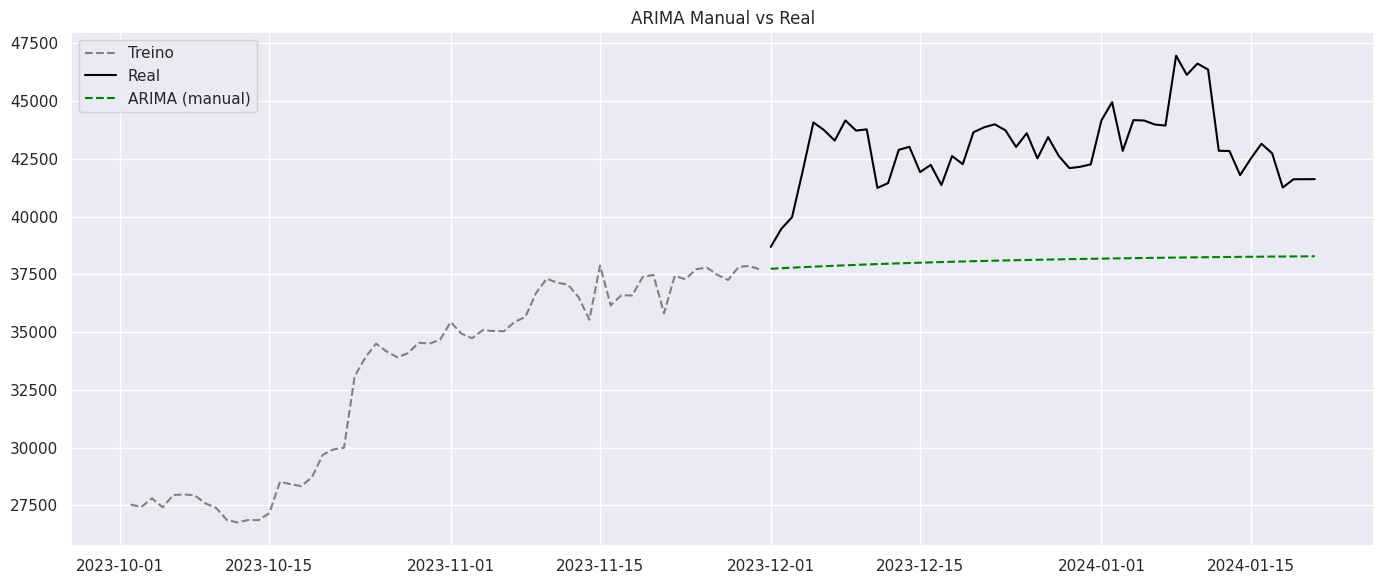

Métricas - ARIMA Manual


,Modelo,MAE,RMSE
0,ARIMA Manual,4921.707854,5158.163005



 Previsões - ARIMA Manual


,Data,Real,ARIMA
2023-12-01,2023-12-01,38688.750000,37743.836382
2023-12-02,2023-12-02,39476.332031,37767.376410
2023-12-03,2023-12-03,39978.390625,37790.255602
2023-12-04,2023-12-04,41980.097656,37812.263837
2023-12-05,2023-12-05,44080.648438,37833.442328
2023-12-06,2023-12-06,43746.445313,37853.822071
2023-12-07,2023-12-07,43292.664063,37873.433200
2023-12-08,2023-12-08,44166.601563,37892.304703
2023-12-09,2023-12-09,43725.984375,37910.464476
2023-12-10,2023-12-10,43779.699219,37927.939360


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

order = (2, 1, 2)

# 2. Treinar o modelo
model_manual = ARIMA(train['Close'], order=order)
model_manual_fit = model_manual.fit()

# 3. Fazer previsões
forecast_manual = model_manual_fit.forecast(steps=len(test))

# 4. Avaliar
mae_manual = mean_absolute_error(test['Close'], forecast_manual)
rmse_manual = mean_squared_error(test['Close'], forecast_manual) ** 0.5

for order in [(2,1,2), (3,1,2), (3,1,1)]:
    model = ARIMA(train['Close'], order=order)
    model_fit = model.fit()
    pred = model_fit.forecast(steps=len(test))
    mae = mean_absolute_error(test['Close'], pred)
    rmse = mean_squared_error(test['Close'], pred) ** 0.5
    print(f"ARIMA{order} → MAE: {mae:.2f} | RMSE: {rmse:.2f}")

# 5. Plotar
plt.figure(figsize=(14, 6))
plt.plot(train.index[-60:], train['Close'][-60:], label="Treino", linestyle="--", color="gray")
plt.plot(test.index, test['Close'], label="Real", color="black")
plt.plot(test.index, forecast_manual, label="ARIMA (manual)", linestyle="--", color="green")
plt.title("ARIMA Manual vs Real")
plt.legend()
plt.tight_layout()
plt.show()

tabela_previsoes_arima = pd.DataFrame({
    "Data": test.index,
    "Real": test['Close'].values,
    "ARIMA": forecast_manual
})

tabela_metricas_arima = pd.DataFrame({
    "Modelo": ["ARIMA Manual"],
    "MAE": [mae_manual],
    "RMSE": [rmse_manual]
})

print("Métricas - ARIMA Manual")
display(tabela_metricas_arima)

print("\n Previsões - ARIMA Manual")
display(tabela_previsoes_arima.head(10))

# **Prophet**

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j412rw_/ogtaxq3a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j412rw_/an7cq8v5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95321', 'data', 'file=/tmp/tmp5j412rw_/ogtaxq3a.json', 'init=/tmp/tmp5j412rw_/an7cq8v5.json', 'output', 'file=/tmp/tmp5j412rw_/prophet_modelkjq7ty3r/prophet_model-20250521224615.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:46:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:46:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


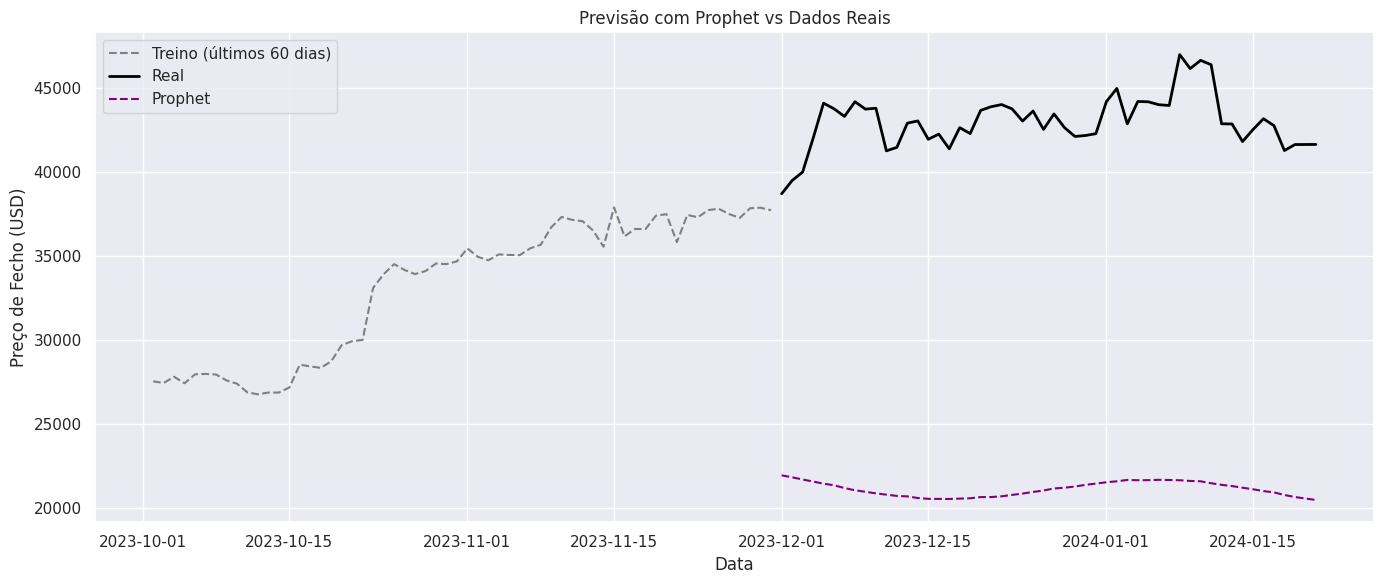

📊 Métricas - Prophet


,Modelo,MAE,RMSE
0,Prophet,21880.929283,21938.071167



📅 Previsões - Prophet


,Data,Real,Prophet
0,2023-12-01,38688.750000,21936.436249
1,2023-12-02,39476.332031,21819.670330
2,2023-12-03,39978.390625,21687.851907
3,2023-12-04,41980.097656,21567.903623
4,2023-12-05,44080.648438,21437.641165
5,2023-12-06,43746.445313,21345.322942
6,2023-12-07,43292.664063,21177.345408
7,2023-12-08,44166.601563,21047.798972
8,2023-12-09,43725.984375,20957.307878
9,2023-12-10,43779.699219,20861.295737


In [ ]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error

df_prophet_train = train.reset_index()[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})
df_prophet_test = test.reset_index()[['Date']].rename(columns={'Date': 'ds'})

# Treino do modelo Prophet
model_prophet = Prophet()
model_prophet.fit(df_prophet_train)

# Prever
forecast_prophet = model_prophet.predict(df_prophet_test)

# Avaliar
y_true = test['Close'].values
y_pred = forecast_prophet['yhat'].values
mae_prophet = mean_absolute_error(y_true, y_pred)
rmse_prophet = mean_squared_error(y_true, y_pred) ** 0.5

# Plot
plt.figure(figsize=(14, 6))
plt.plot(train.index[-60:], train['Close'][-60:], label="Treino (últimos 60 dias)", color="gray", linestyle='--')
plt.plot(test.index, test['Close'], label="Real", color="black", linewidth=2)
plt.plot(test.index, y_pred, label="Prophet", linestyle='--', color='purple')
plt.title("Previsão com Prophet vs Dados Reais")
plt.xlabel("Data")
plt.ylabel("Preço de Fecho (USD)")
plt.legend()
plt.tight_layout()
plt.show()

tabela_previsoes_prophet = pd.DataFrame({
    "Data": test.index,
    "Real": y_true,
    "Prophet": y_pred
})
tabela_metricas_prophet = pd.DataFrame({
    "Modelo": ["Prophet"],
    "MAE": [mae_prophet],
    "RMSE": [rmse_prophet]
})

# Mostrar
print("📊 Métricas - Prophet")
display(tabela_metricas_prophet)
print("\n📅 Previsões - Prophet")
display(tabela_previsoes_prophet.head(10))

# **Comparação de todos os modelos**

,Modelo,MAE,RMSE
0,Holt-Winters,3173.059292,4185.309343
1,ARIMA Manual,4921.707854,5158.163005
2,Prophet,21880.929283,21938.071167


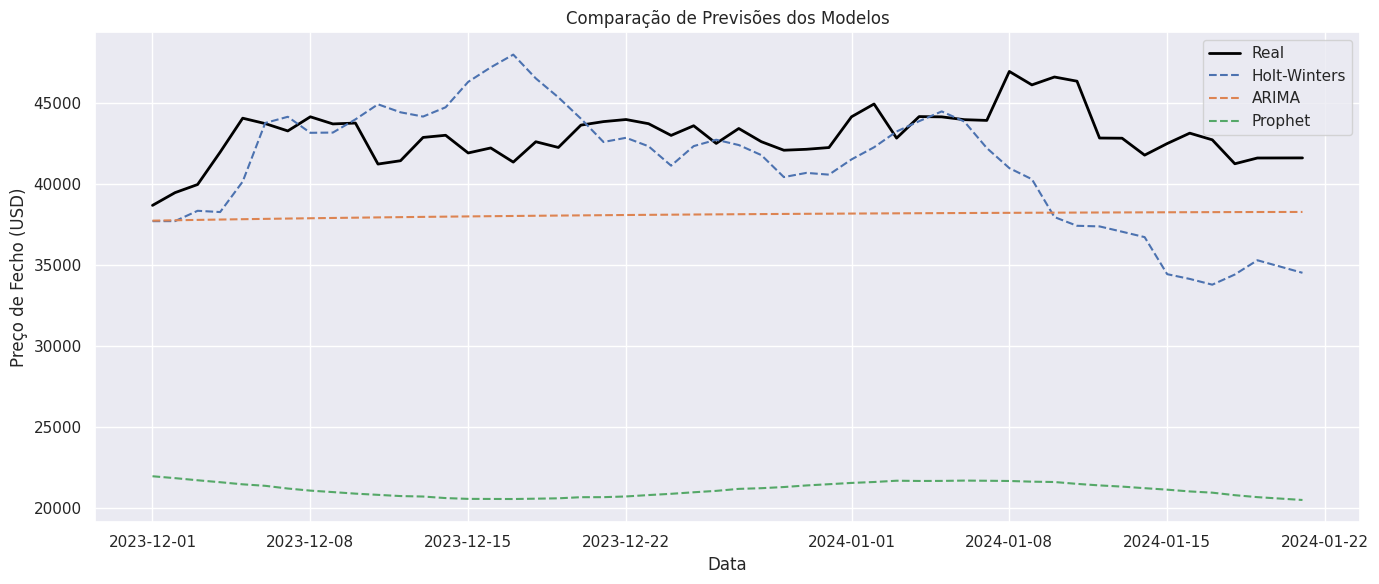

Métricas - Prophet


,Modelo,MAE,RMSE
0,Prophet,21880.929283,21938.071167



 Previsões - Prophet


,Data,Real,Prophet
0,2023-12-01,38688.750000,21936.436249
1,2023-12-02,39476.332031,21819.670330
2,2023-12-03,39978.390625,21687.851907
3,2023-12-04,41980.097656,21567.903623
4,2023-12-05,44080.648438,21437.641165
5,2023-12-06,43746.445313,21345.322942
6,2023-12-07,43292.664063,21177.345408
7,2023-12-08,44166.601563,21047.798972
8,2023-12-09,43725.984375,20957.307878
9,2023-12-10,43779.699219,20861.295737



 Métricas - ARIMA


,Modelo,MAE,RMSE
0,ARIMA Manual,4921.707854,5158.163005



 Previsões - ARIMA


,Data,Real,ARIMA
2023-12-01,2023-12-01,38688.750000,37743.836382
2023-12-02,2023-12-02,39476.332031,37767.376410
2023-12-03,2023-12-03,39978.390625,37790.255602
2023-12-04,2023-12-04,41980.097656,37812.263837
2023-12-05,2023-12-05,44080.648438,37833.442328
2023-12-06,2023-12-06,43746.445313,37853.822071
2023-12-07,2023-12-07,43292.664063,37873.433200
2023-12-08,2023-12-08,44166.601563,37892.304703
2023-12-09,2023-12-09,43725.984375,37910.464476
2023-12-10,2023-12-10,43779.699219,37927.939360


In [ ]:
comparacao_modelos = pd.DataFrame({
    "Data": test.index,
    "Real": test['Close'].values,
    "Holt-Winters": forecast_hw.values,
    "ARIMA": forecast_manual,
    "Prophet": y_pred  # vindo do forecast_prophet['yhat'].values
})

# Guardar num CSV
comparacao_modelos.to_csv("comparacao_previsoes_todos.csv", index=False)

todas_metricas = pd.concat([
    tabela_metricas_hw,
    tabela_metricas_arima,
    tabela_metricas_prophet
], ignore_index=True)

todas_metricas.to_csv("comparacao_metricas_todos.csv", index=False)
display(todas_metricas)

plt.figure(figsize=(14, 6))
plt.plot(test.index, test['Close'], label="Real", color="black", linewidth=2)
plt.plot(test.index, forecast_hw, label="Holt-Winters", linestyle='--')
plt.plot(test.index, forecast_manual, label="ARIMA", linestyle='--')
plt.plot(test.index, y_pred, label="Prophet", linestyle='--')
plt.title("Comparação de Previsões dos Modelos")
plt.xlabel("Data")
plt.ylabel("Preço de Fecho (USD)")
plt.legend()
plt.tight_layout()
plt.show()

print("Métricas - Prophet")
display(tabela_metricas_prophet)
print("\n Previsões - Prophet")
display(tabela_previsoes_prophet.head(10))
print("\n Métricas - ARIMA")
display(tabela_metricas_arima)
print("\n Previsões - ARIMA")
display(tabela_previsoes_arima.head(10))